**News Classification Using LSTM**

In [1]:
import pandas as pd


In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/New_Classification_lstm"

/content/drive/MyDrive/New_Classification_lstm


In [4]:
data=pd.read_csv("uci-news-aggregator (1).csv").iloc[:100000,:]

In [5]:
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [6]:

data.shape

(100000, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   TITLE      100000 non-null  object
 2   URL        100000 non-null  object
 3   PUBLISHER  99998 non-null   object
 4   CATEGORY   100000 non-null  object
 5   STORY      100000 non-null  object
 6   HOSTNAME   100000 non-null  object
 7   TIMESTAMP  100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [9]:
# Checking null values
data['TITLE'].isna().sum()

0

In [10]:
data['CATEGORY'].isna().sum()

0

In [8]:
data.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [9]:
#Drop Cloumns
columns_to_drop = ['ID', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME', 'TIMESTAMP']
data.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
data.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [11]:
data['CATEGORY'].value_counts()

e    35475
b    28160
t    25362
m    11003
Name: CATEGORY, dtype: int64

In [12]:
X = data['TITLE']
y = data['CATEGORY']
print('Shape of X : {}\nShape of y : {}'.format(X.shape, y.shape))

Shape of X : (100000,)
Shape of y : (100000,)


In [13]:
y.unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [14]:
y.replace({'b':0, 't':1, 'e':2, 'm':3}, inplace=True)
y.unique()

array([0, 1, 2, 3])

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [16]:
### Vocabulary size
voc_size=5000

In [17]:
## Data Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Creating a copy of the model
news_titles = X.copy()

# Downloading stop words
nltk.download('stopwords')

# Initializing the stemmer object
ps = PorterStemmer()

# Preprocessing the data
corpus = []
for i in range(0, len(news_titles)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', news_titles[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
news_titles

0        Fed official says weak data caused by weather,...
1        Fed's Charles Plosser sees high bar for change...
2        US open: Stocks fall after Fed official hints ...
3        Fed risks falling 'behind the curve', Charles ...
4        Fed's Plosser: Nasty Weather Has Curbed Job Gr...
                               ...                        
99995    Medicare Records Provide Tantalizing New Detai...
99996    Capsules: Alzheimer's Disease Support Model Co...
99997    The Eye Doctors of Medicare's Million Dollar P...
99998        Doctor-Pay Trove Shows Limits of Billing Data
99999      What the Trove of Medicare Data Doesn't Tell Us
Name: TITLE, Length: 100000, dtype: object

In [19]:
# One hot representation of data
onehot_repr=[one_hot(words,voc_size)for words in corpus]
sent_length=4000
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1116 4989  220]
 [   0    0    0 ... 4096  357  220]
 [   0    0    0 ... 4552 4052  220]
 ...
 [   0    0    0 ... 2130 2845 1142]
 [   0    0    0 ... 4321 1232 2314]
 [   0    0    0 ... 2314 2013  227]]


In [20]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(4,activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4000, 40)          200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 256804 (1003.14 KB)
Trainable params: 256804 (1003.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [23]:
# Splitting the data
import numpy as np
X_final=np.array(embedded_docs)
y_final=tf.keras.utils.to_categorical(y, num_classes=4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)

(67000, 4000) (67000, 4)


In [24]:
X_train

array([[   0,    0,    0, ..., 3434, 3425, 4004],
       [   0,    0,    0, ...,  227,  416, 4030],
       [   0,    0,    0, ..., 4707, 4582, 3494],
       ...,
       [   0,    0,    0, ...,  408, 1507, 1072],
       [   0,    0,    0, ..., 4097,  252, 2314],
       [   0,    0,    0, ...,    0,  792, 3569]], dtype=int32)

In [25]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
2094/2094 [==============================] - 342s 162ms/step - loss: 0.3889 - accuracy: 0.8646 - val_loss: 0.2272 - val_accuracy: 0.9216
Epoch 2/10
2094/2094 [==============================] - 329s 157ms/step - loss: 0.1800 - accuracy: 0.9395 - val_loss: 0.2122 - val_accuracy: 0.9277
Epoch 3/10
2094/2094 [==============================] - 293s 140ms/step - loss: 0.1513 - accuracy: 0.9483 - val_loss: 0.2177 - val_accuracy: 0.9265
Epoch 4/10
2094/2094 [==============================] - 329s 157ms/step - loss: 0.1343 - accuracy: 0.9547 - val_loss: 0.2225 - val_accuracy: 0.9265
Epoch 5/10
2094/2094 [==============================] - 328s 157ms/step - loss: 0.1235 - accuracy: 0.9578 - val_loss: 0.2320 - val_accuracy: 0.9272
Epoch 6/10
2094/2094 [==============================] - 292s 140ms/step - loss: 0.1039 - accuracy: 0.9647 - val_loss: 0.2452 - val_accuracy: 0.9254
Epoch 7/10
2094/2094 [==============================] - 329s 157ms/step - loss: 0.0900 - accuracy: 0.9692 - val_

In [26]:

results = model.evaluate(X_test,y_test)


1032/1032 [==============================] - 59s 57ms/step - loss: 0.3362 - accuracy: 0.9203


In [27]:
print("Test Score",results[0])
print("Test accuaracy",results[1])

Test Score 0.3361920118331909
Test accuaracy 0.920272707939148


In [31]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)


1032/1032 [==============================] - 48s 46ms/step


In [33]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_matrix


array([[ 8536,   428,   199,   145],
       [  559,  7368,   234,    80],
       [  286,   173, 11205,   107],
       [  236,    73,   111,  3260]])

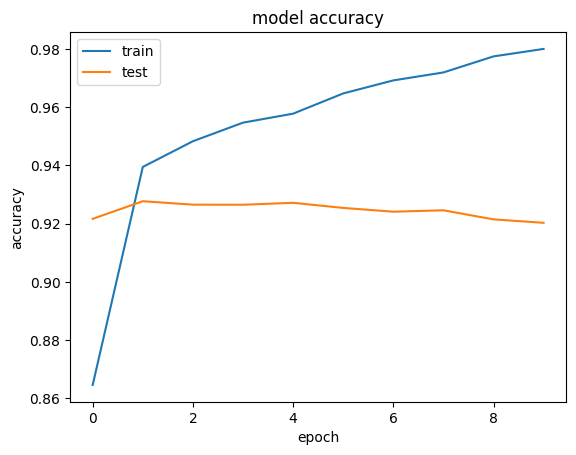

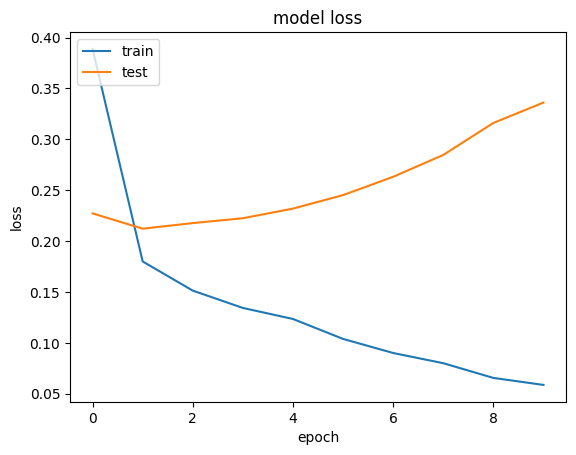

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()